In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import modules.utils as tools
import sklearn

In [3]:
import pandas as pd
df_5 = pd.read_csv('processed_csv/B0005_processed.csv', index_col = 0)
df_5['remaining_cycles'] = len(df_5[df_5.capacity>1.4]) - (df_5.index+1)
df_6 = pd.read_csv('processed_csv/B0006_processed.csv', index_col = 0)
df_6['remaining_cycles'] = len(df_6[df_6.capacity>1.4]) - (df_6.index+1)
df_7 = pd.read_csv('processed_csv/B0007_processed.csv', index_col = 0)
df_7['remaining_cycles'] = len(df_7[df_7.capacity>1.4]) - (df_7.index+1)

In [4]:
df_5[df_5.remaining_cycles == 0]

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,max_temp_C,capacity,remaining_cycles
123,2540.235,40.815061,0.006484,2426.375,-0.000437,2216.687,29.935658,1.401204,0


In [5]:
df_5.drop(['max_temp_C'], axis=1, inplace=True)
df_6.drop(['max_temp_C'], axis=1, inplace=True)
df_7.drop(['max_temp_C'], axis=1, inplace=True)

In [6]:
df_5['cell'] = 5
df_6['cell'] = 6
df_7['cell'] = 7
df_all = pd.concat([df_5, df_6, df_7])
df_all.reset_index(inplace=True)
df_all.drop(["index"], axis=1, inplace=True)
df_all

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,capacity,remaining_cycles,cell
0,3366.781,38.982181,0.004352,3287.969,-0.000339,1006.094,1.856487,123,5
1,3348.735,39.033398,0.004281,3269.688,-0.000341,3447.609,1.846327,122,5
2,3329.281,38.818797,0.004231,3250.437,-0.000341,3419.156,1.835349,121,5
3,3329.500,38.762305,0.004237,3250.563,-0.000342,3421.593,1.835263,120,5
4,3327.531,38.665393,0.004250,3248.766,-0.000342,3395.125,1.834646,119,5
...,...,...,...,...,...,...,...,...,...
499,2617.109,40.741759,0.006586,2472.172,-0.000444,2325.594,1.406171,4,7
500,2617.297,41.009644,0.006669,2462.750,-0.000444,2318.640,1.406336,3,7
501,2606.547,40.805587,0.006603,2461.547,-0.000444,2276.906,1.400455,2,7
502,2645.328,40.925860,0.006213,2490.625,-0.000433,2287.109,1.421787,1,7


In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
SSS = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)
for train_index, test_index in SSS.split(df_all, df_all.cell):
    df_train = df_all.loc[train_index]
    df_val_test = df_all.loc[test_index]

In [13]:
df_train

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,capacity,remaining_cycles,cell
365,3392.719,38.838056,0.004515,3312.734,-0.000346,3513.719,1.849202,138,7
150,2466.531,41.046695,0.006815,2351.953,-0.000455,1984.625,1.360122,-27,5
394,3200.734,40.247716,0.005006,3104.109,-0.000362,3241.531,1.739646,109,7
320,2277.360,41.209208,0.007573,2136.531,-0.000550,1812.688,1.247976,-44,6
345,3470.047,40.052022,0.004571,3369.813,-0.000346,3551.797,1.870052,158,7
...,...,...,...,...,...,...,...,...,...
157,2373.125,40.843374,0.007224,2258.657,-0.000466,1968.438,1.307796,-34,5
354,3390.281,39.412632,0.004550,3310.219,-0.000348,3451.719,1.848379,149,7
145,2400.781,40.858744,0.007141,2277.000,-0.000460,1997.985,1.323171,-22,5
26,3292.609,38.111002,0.004343,3213.625,-0.000339,3385.047,1.814769,97,5


In [12]:
SSS2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=1)
for val_index, test_index in SSS2.split(df_val_test, df_val_test.cell):
    df_val = df_val_test.iloc[val_index]
    df_test = df_val_test.iloc[test_index]

In [15]:
df_train.cell.value_counts()/ len(df_train)

5    0.334437
6    0.334437
7    0.331126
Name: cell, dtype: float64

In [16]:
df_val.cell.value_counts()/ len(df_val)

5    0.336634
7    0.336634
6    0.326733
Name: cell, dtype: float64

In [17]:
df_test.cell.value_counts()/ len(df_test)

7    0.336634
6    0.336634
5    0.326733
Name: cell, dtype: float64

In [18]:
print(len(df_train), len(df_val), len(df_test))

302 101 101


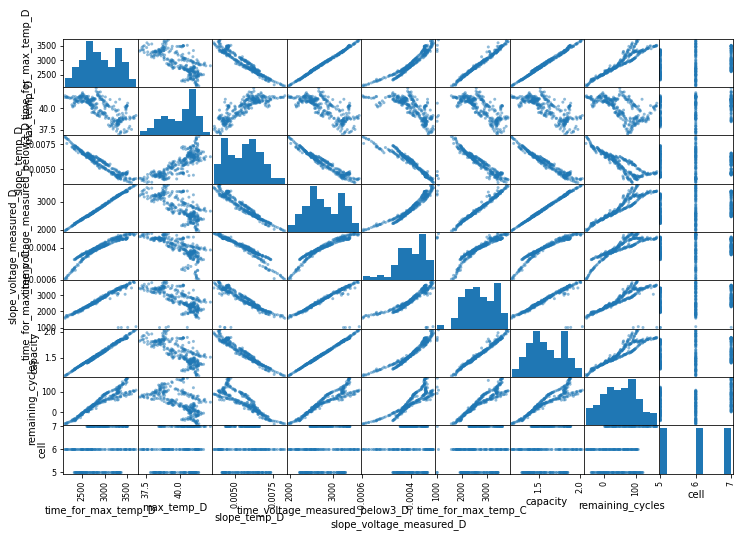

In [19]:
from pandas.plotting import scatter_matrix

attributes = df_train.columns
scatter_matrix(df_train[attributes], figsize=(12,8))
plt.show()


In [20]:
corr_matrix = df_train.corr()
corr_matrix

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,capacity,remaining_cycles,cell
time_for_max_temp_D,1.000000,-0.736666,-0.968680,0.998921,0.946686,0.864863,0.997005,0.945995,0.174580
max_temp_D,-0.736666,1.000000,0.830398,-0.754369,-0.730048,-0.701909,-0.769065,-0.590985,0.234776
slope_temp_D,-0.968680,0.830398,1.000000,-0.974502,-0.961415,-0.861632,-0.979444,-0.881864,-0.013212
time_voltage_measured_below3_D,0.998921,-0.754369,-0.974502,1.000000,0.950858,0.866798,0.998998,0.939556,0.135992
slope_voltage_measured_D,0.946686,-0.730048,-0.961415,0.950858,1.000000,0.837801,0.951347,0.887563,0.043019
time_for_max_temp_C,0.864863,-0.701909,-0.861632,0.866798,0.837801,1.000000,0.863457,0.823249,0.154522
capacity,0.997005,-0.769065,-0.979444,0.998998,0.951347,0.863457,1.000000,0.928437,0.105970
remaining_cycles,0.945995,-0.590985,-0.881864,0.939556,0.887563,0.823249,0.928437,1.000000,0.297408
cell,0.174580,0.234776,-0.013212,0.135992,0.043019,0.154522,0.105970,0.297408,1.000000


In [27]:
X_train = df_train.drop(['remaining_cycles', 'cell', 'capacity'], axis = 1)
y_train = df_train.capacity
X_test = df_test.drop(['remaining_cycles','cell', 'capacity'], axis = 1)
y_test = df_test.capacity
X_val = df_val.drop(['remaining_cycles','cell', 'capacity'], axis = 1)
y_val = df_val.capacity

In [22]:
X_train

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C
365,3392.719,38.838056,0.004515,3312.734,-0.000346,3513.719
150,2466.531,41.046695,0.006815,2351.953,-0.000455,1984.625
394,3200.734,40.247716,0.005006,3104.109,-0.000362,3241.531
320,2277.360,41.209208,0.007573,2136.531,-0.000550,1812.688
345,3470.047,40.052022,0.004571,3369.813,-0.000346,3551.797
...,...,...,...,...,...,...
157,2373.125,40.843374,0.007224,2258.657,-0.000466,1968.438
354,3390.281,39.412632,0.004550,3310.219,-0.000348,3451.719
145,2400.781,40.858744,0.007141,2277.000,-0.000460,1997.985
26,3292.609,38.111002,0.004343,3213.625,-0.000339,3385.047


In [11]:
'''
X_5 = df_5.drop(['remaining_cycles'], axis=1)
y_5 = df_5.remaining_cycles
X_6 = df_6.drop(['remaining_cycles'], axis=1)
y_6 = df_6.remaining_cycles
X_7 = df_7.drop(['remaining_cycles'], axis=1)
y_7 = df_7.remaining_cycles
'''

In [28]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

lin_reg = LinearRegression()
sgd_reg = SGDRegressor(random_state=42)

lin_reg.fit(X_train_scaled, y_train)
sgd_reg.fit(X_train_scaled, y_train)

SGDRegressor(random_state=42)

In [30]:
sgd_predictions = sgd_reg.predict(X_val_scaled)
lin_predictions = lin_reg.predict(X_val_scaled)

In [31]:
sgd_predictions

array([1.79266875, 1.46434323, 1.91742231, 1.50588572, 1.2928694 ,
       1.45846617, 1.49775845, 1.76359383, 1.83894241, 1.34017483,
       1.28698076, 1.60860127, 1.48013855, 1.44093422, 1.30310536,
       1.77097939, 1.69356131, 1.52015088, 1.27776924, 1.61468979,
       1.57287346, 1.83595745, 1.45030042, 1.29730706, 1.81803739,
       1.5705573 , 1.79014567, 1.86726036, 1.38332129, 1.82535324,
       1.85517899, 1.52168305, 1.67319314, 1.45577346, 1.37356883,
       1.23275825, 1.79981812, 1.42765345, 1.53988008, 1.31352861,
       1.46562926, 1.44228854, 1.79558716, 1.53358906, 1.78767651,
       1.36444548, 1.9667433 , 1.56232652, 1.59506231, 1.55073947,
       1.82190401, 1.34867468, 1.77853644, 1.59303288, 1.16091799,
       1.31526046, 1.52213999, 1.15790108, 1.78308033, 1.8127909 ,
       1.78255119, 1.44812852, 1.59987818, 1.81779637, 1.4262974 ,
       1.42184851, 1.69557023, 1.83237481, 1.8585047 , 1.8254852 ,
       1.334545  , 1.40910247, 1.86165083, 1.51556814, 1.52615

In [32]:
from sklearn.metrics import mean_squared_error

rmse_lin = np.sqrt(mean_squared_error(lin_predictions, y_val))
rmse_sgd = np.sqrt(mean_squared_error(sgd_predictions, y_val))

In [33]:
print(rmse_lin, rmse_sgd)

0.007629726155449008 0.01741689827300517


In [30]:
df_6 = pd.read_csv('processed_csv/B0006_processed.csv', index_col = 0)
df_6['remaining_cycles'] = len(df_6[df_6.capacity>1.4]) - (df_6.index+1)

df_6[df_6.remaining_cycles == 1]

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,max_temp_C,capacity,remaining_cycles
107,2557.719,41.216881,0.006598,2426.375,-0.000463,2170.953,29.424227,1.404917,1


In [31]:
df_6.drop(['max_temp_C', 'capacity'], axis=1, inplace=True)
X_6 = df_6.drop(['remaining_cycles'], axis=1)
y_6 = df_6.remaining_cycles


In [32]:
X_6_scaled = scaler.transform(X_6)

In [33]:
sgd_predictions_6 = sgd_reg.predict(X_6_scaled)
lin_predictions_6 = lin_reg.predict(X_6_scaled)

In [34]:
sgd_predictions_6

array([148.63836289, 136.36084321, 135.72040062, 134.31097699,
       132.87971374, 134.11260591, 132.68354682, 129.07346731,
       127.16874985, 125.52908593, 124.89436144, 123.96417313,
       120.95732663, 120.24326778, 116.50719198, 113.6743961 ,
       113.35461881, 111.13077247, 110.69750323, 137.60504863,
       133.0528405 , 130.70464014, 127.06110754, 127.22602338,
       121.19872653, 117.93229586, 117.61173726, 115.553661  ,
       111.72504672, 113.50426165, 124.60275175, 126.72635892,
       112.14546852, 109.75480604, 106.17088148, 102.88402417,
       101.04005261,  96.8642696 ,  94.30143026,  91.30926276,
        89.95840393,  86.8390631 ,  91.33177116,  91.97912074,
        84.70229841,  80.07946984,  76.35848338, 108.89166857,
       103.36318407,  95.13287006,  86.60555536,  83.89391673,
        79.03253839,  75.9396535 ,  73.0461702 ,  69.30943951,
        66.5993836 ,  63.06074354,  61.55946563,  58.64629075,
        53.92771349,  50.99042874,  48.8511161 ,  51.01

In [35]:
rmse_lin = np.sqrt(mean_squared_error(lin_predictions_6, y_6))
rmse_sgd = np.sqrt(mean_squared_error(sgd_predictions_6, y_6))

In [36]:
print(rmse_lin, rmse_sgd)

26.13146010269372 21.408136208635693


In [101]:
from sklearn.ensemble import IsolationForest
import numpy as np
clf = IsolationForest(n_estimators=100, contamination=0.03, warm_start=True)
first_scores = clf.fit_predict(df_train[['time_for_max_temp_C', 'remaining_cycles']])  # fit the added trees 
clf.set_params(max_features=2)
second_scores = clf.fit_predict(df_train)
print(first_scores)
print(second_scores)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1

/home/hkqai/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:352: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


In [104]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
print(precision_score(first_scores==-1, second_scores==-1))
print(recall_score(first_scores==-1, second_scores==-1))
print(f1_score(first_scores==-1, second_scores==-1))
conf_mx = confusion_matrix(first_scores==-1, second_scores==-1)
conf_mx

0.16666666666666666
0.15384615384615385
0.16


array([[380,  10],
       [ 11,   2]])